## Read a CSV file

In [79]:
import pandas as pd
#read a csv file
df=pd.read_csv('/Users/saaijeeshsn/Library/CloudStorage/OneDrive-UCB-O365/ML/cleaned_data1.csv')
df.head()

,date,month,customer_code,product_code,division,segment,category,product,variant,customer,market,platform,channel,sub_zone,region,quantity,manufacturing_cost,freight_cost,net_sales_amount,holiday_count
0,2018-09-01,September,90023030,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,16,85.4272,4.0503,163.98,0
1,2018-09-01,September,90010046,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Bangladesh,E-Commerce,Retailer,ROA,APAC,3,16.0176,0.7408,24.53,0
2,2018-09-01,September,90023023,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Canada,E-Commerce,Retailer,NaN,NaN,31,165.5152,7.6096,308.08,0
3,2018-09-01,September,90012041,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Germany,E-Commerce,Retailer,NE,EU,18,96.1056,4.5517,155.88,0
4,2018-09-01,September,90014141,A0418150108,P & A,Peripherals,Graphic Card,AQ Mforce Gen X,Premium 2,Amazon,Netherlands,E-Commerce,Retailer,NE,EU,2,10.6784,0.5055,18.12,0


In [80]:
import pandas as pd

# Group by 'customer', 'market', 'product', and 'variant' columns and sum the numeric columns
grouped_df = df.groupby(['customer', 'market', 'product', 'variant','category']).agg(
    quantity=('quantity', 'sum'),
    manufacturing_cost=('manufacturing_cost', 'sum'),
    freight_cost=('freight_cost', 'sum'),
    net_sales_amount=('net_sales_amount', 'sum')
).reset_index()


# Display the first few rows of the grouped dataframe
grouped_df.head()


,customer,market,product,variant,category,quantity,manufacturing_cost,freight_cost,net_sales_amount
0,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Processors,986,38699.1881,1356.8217,61517.57
1,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Premium,Processors,960,38206.9456,1360.3016,61542.13
2,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Standard,Processors,1120,41627.1948,1455.7418,66188.00
3,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 9 5900X Desktop Processor,Plus,Processors,868,30223.6821,1127.7012,51143.07
4,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 9 5900X Desktop Processor,Premium,Processors,1005,35707.6246,1285.7464,58490.28


In [81]:
grouped_df.describe()

,quantity,manufacturing_cost,freight_cost,net_sales_amount
count,47524.000000,47524.000000,47524.000000,47524.000000
mean,1419.232619,11116.477573,568.658868,18581.060237
std,3171.255139,18530.242777,946.448751,30320.842808
min,1.000000,12.015400,0.531700,16.210000
25%,65.000000,2281.518000,115.064900,3906.312500
50%,309.000000,4991.907900,247.701300,8386.695000
75%,1325.000000,11657.836750,590.606800,19974.117500
max,50632.000000,346043.153900,18370.483400,588860.670000


In [82]:
grouped_df.shape

(47524, 9)

In [83]:
# Define a function to categorize the net sales amount
def categorize_sales(net_sales_amount):
    if net_sales_amount <= 35000:
        return "Low sales"
    elif 35000 < net_sales_amount <= 58000:
        return "Medium sales"
    else:
        return "High sales"

# Apply the categorization function to create a new column 'sales_range'
grouped_df['sales_range'] = grouped_df['net_sales_amount'].apply(categorize_sales)

grouped_df.head()



,customer,market,product,variant,category,quantity,manufacturing_cost,freight_cost,net_sales_amount,sales_range
0,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Processors,986,38699.1881,1356.8217,61517.57,High sales
1,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Premium,Processors,960,38206.9456,1360.3016,61542.13,High sales
2,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Standard,Processors,1120,41627.1948,1455.7418,66188.00,High sales
3,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 9 5900X Desktop Processor,Plus,Processors,868,30223.6821,1127.7012,51143.07,Medium sales
4,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 9 5900X Desktop Processor,Premium,Processors,1005,35707.6246,1285.7464,58490.28,High sales


## Select the required features for PCA

In [84]:
# Drop specified columns
pca_filtered_data = grouped_df.drop(columns=['customer', 'market', 'product', 'variant', 'sales_range','category'])

# Display the first few rows of the dataframe
pca_filtered_data.head()


,quantity,manufacturing_cost,freight_cost,net_sales_amount
0,986,38699.1881,1356.8217,61517.57
1,960,38206.9456,1360.3016,61542.13
2,1120,41627.1948,1455.7418,66188.00
3,868,30223.6821,1127.7012,51143.07
4,1005,35707.6246,1285.7464,58490.28


In [85]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(pca_filtered_data)

# Convert the scaled data back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=pca_filtered_data.columns)

# Display the scaled DataFrame
scaled_df.head()


,quantity,manufacturing_cost,freight_cost,net_sales_amount
0,-0.136614,1.488540,0.832767,1.416087
1,-0.144813,1.461975,0.836444,1.416897
2,-0.094359,1.646554,0.937285,1.570123
3,-0.173823,1.031147,0.590680,1.073926
4,-0.130622,1.327096,0.757669,1.316244


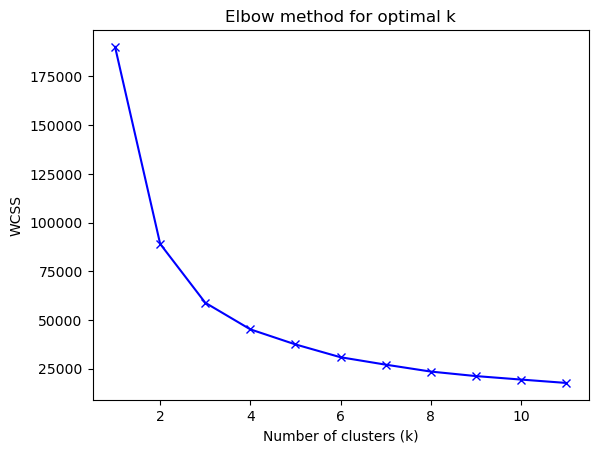

In [86]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(scaled_df)

#compute wcss for different number of clusters
wcss=[]
for i in range(1,12):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    
#plot the wcss against the no of cluster 
plt.plot(range(1,12),wcss, 'bx-')
plt.title('Elbow method for optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


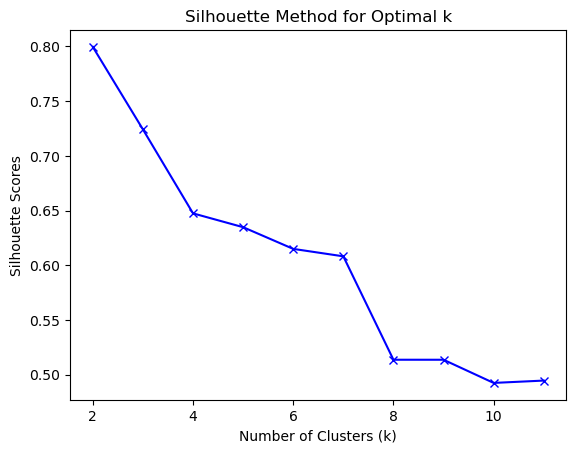

In [87]:
from sklearn.metrics import silhouette_score

#compute silhouette scores for different number of clusters
silhouette_scores = []
for i in range(2, 12):
    kmeans_clus = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    cluster_labels = kmeans_clus.fit_predict(X_scaled)
    silhouette_score_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_score_avg)
    
#plot the silhouette scores against the number of clusters
plt.plot(range(2, 12), silhouette_scores, 'bx-')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Scores')
plt.show()


In [88]:
# Calculate the correlation matrix
correlation_matrix = scaled_df.corr()

# Print the correlation matrix
correlation_matrix



,quantity,manufacturing_cost,freight_cost,net_sales_amount
quantity,1.000000,0.645338,0.634267,0.644294
manufacturing_cost,0.645338,1.000000,0.988169,0.996406
freight_cost,0.634267,0.988169,1.000000,0.991717
net_sales_amount,0.644294,0.996406,0.991717,1.000000


In [89]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_df)

# Create a DataFrame to store the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

pca_df.head()


,PC1,PC2
0,1.914551,-0.999292
1,1.899548,-1.001799
2,2.151406,-1.058414
3,1.350234,-0.789498
4,1.739668,-0.915203


In [90]:
# Get the loading scores
loading_scores = pca.components_.T

# Create a DataFrame to store the loading scores
loading_scores_df = pd.DataFrame(loading_scores, columns=['PC1', 'PC2'], index=scaled_df.columns)

# Display the loading scores
loading_scores_df.head()


,PC1,PC2
quantity,0.408571,0.912630
manufacturing_cost,0.527496,-0.228539
freight_cost,0.525479,-0.246898
net_sales_amount,0.527910,-0.232201


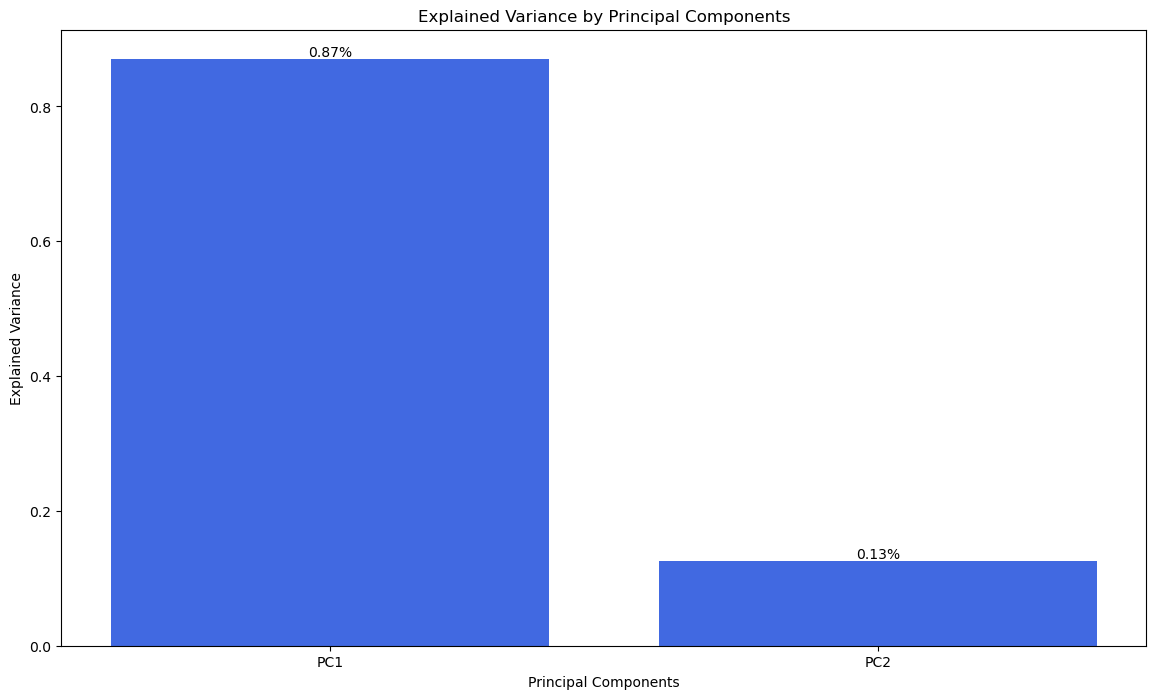

In [91]:
# Extract explained variance
explained_variance = pca.explained_variance_ratio_

# Convert explained variance to percentage
explained_variance_percentage = explained_variance * 100

# Create a DataFrame for plotting
df_explained_variance = pd.DataFrame({
    'PC': ['PC1', 'PC2'],
    'Explained_Variance': explained_variance,
    'Explained_Variance(%)': explained_variance_percentage
})

# Plot scree plot
plt.figure(figsize=(14, 8))
plt.bar(df_explained_variance['PC'], df_explained_variance['Explained_Variance'], color='royalblue')

# Add percentage labels to the bars
for i, value in enumerate(df_explained_variance['Explained_Variance']):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')

plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.show()


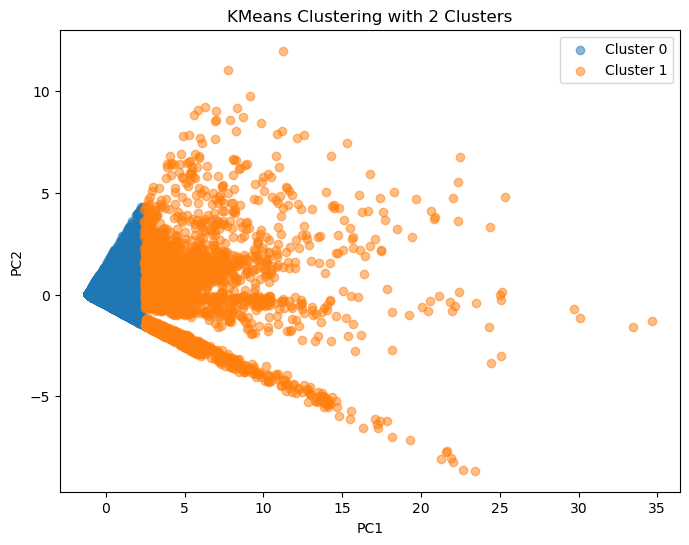

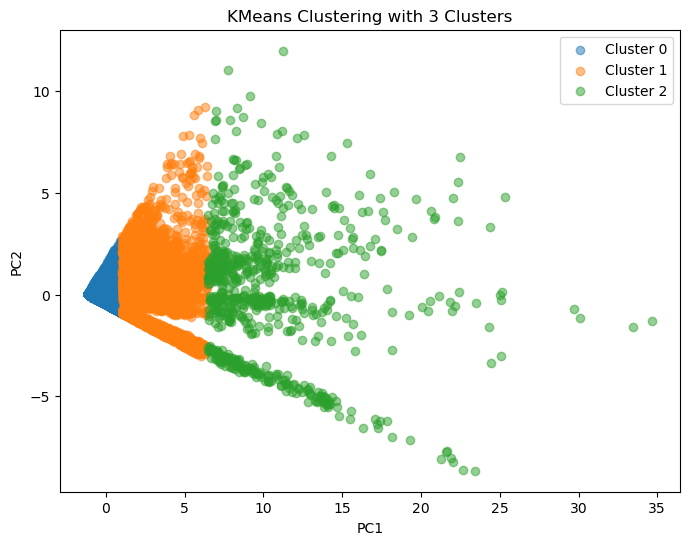

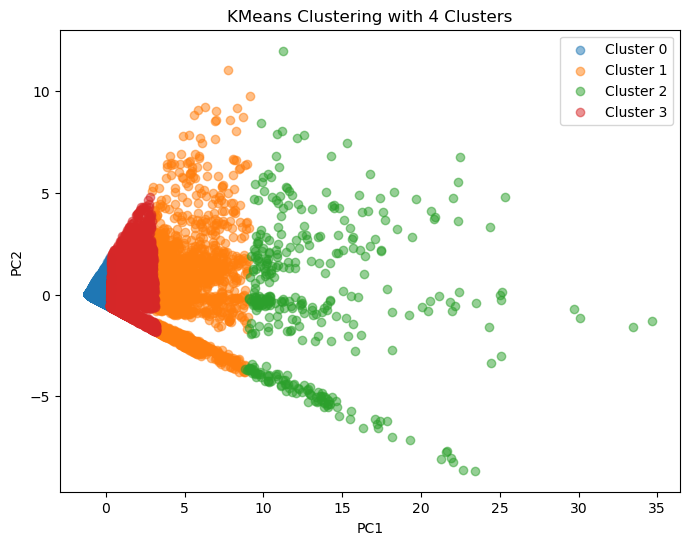

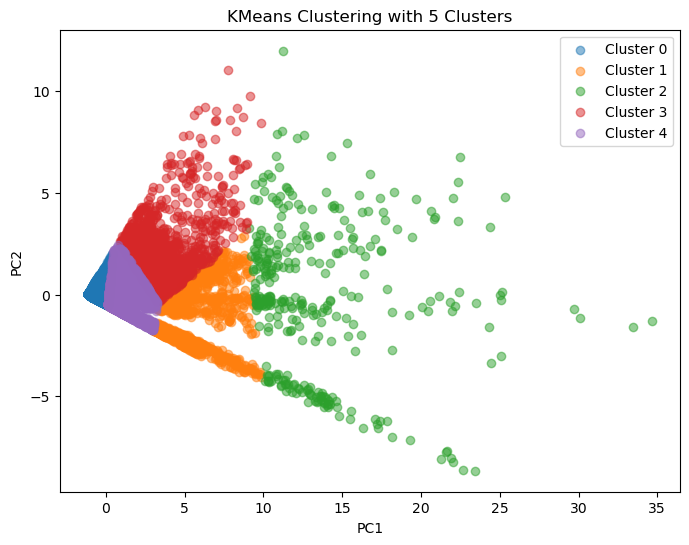

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters
num_clusters = [2, 3, 4, 5]

# Iterate over each number of clusters
for n_clusters in num_clusters:
    # Initialize KMeans with the current number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    
    # Fit KMeans to the scaled data
    cluster_labels = kmeans.fit_predict(scaled_df)
    
    # Plot the clusters
    plt.figure(figsize=(8, 6))
    for cluster in range(n_clusters):
        plt.scatter(pca_df.loc[cluster_labels == cluster, 'PC1'], pca_df.loc[cluster_labels == cluster, 'PC2'], label=f'Cluster {cluster}', alpha=0.5)
    plt.title(f'KMeans Clustering with {n_clusters} Clusters')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.show()




In [67]:
# concatenated_data
concatenated_data = pd.concat([pca_df, grouped_df[['customer', 'market','category','product', 'variant', 'sales_range']]], axis=1)
concatenated_data.head()


,PC1,PC2,customer,market,category,product,variant,sales_range
0,1.914551,-0.999292,Acclaimed Stores,Indonesia,Processors,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,High sales
1,1.899548,-1.001799,Acclaimed Stores,Indonesia,Processors,AQ 5000 Series Electron 8 5900X Desktop Processor,Premium,High sales
2,2.151406,-1.058414,Acclaimed Stores,Indonesia,Processors,AQ 5000 Series Electron 8 5900X Desktop Processor,Standard,High sales
3,1.350234,-0.789498,Acclaimed Stores,Indonesia,Processors,AQ 5000 Series Electron 9 5900X Desktop Processor,Plus,Medium sales
4,1.739668,-0.915203,Acclaimed Stores,Indonesia,Processors,AQ 5000 Series Electron 9 5900X Desktop Processor,Premium,High sales


In [95]:
# Import necessary libraries
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define the number of clusters
n_clusters = 3

# Initialize KMeans with the specified number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)

# Fit KMeans to the scaled data
cluster_labels = kmeans.fit_predict(scaled_df)

# Add cluster labels to the original concatenated dataset
grouped_df['cluster'] = cluster_labels

# Print the counts of each cluster
grouped_df.head()


,customer,market,product,variant,category,quantity,manufacturing_cost,freight_cost,net_sales_amount,sales_range,cluster
0,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Plus,Processors,986,38699.1881,1356.8217,61517.57,High sales,1
1,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Premium,Processors,960,38206.9456,1360.3016,61542.13,High sales,1
2,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 8 5900X Desktop Processor,Standard,Processors,1120,41627.1948,1455.7418,66188.00,High sales,1
3,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 9 5900X Desktop Processor,Plus,Processors,868,30223.6821,1127.7012,51143.07,Medium sales,1
4,Acclaimed Stores,Indonesia,AQ 5000 Series Electron 9 5900X Desktop Processor,Premium,Processors,1005,35707.6246,1285.7464,58490.28,High sales,1


In [101]:
# Import necessary libraries
import pandas as pd

# Analyze the clusters
cluster_analysis = grouped_df.groupby('cluster').agg({
    'customer': 'count',
    'quantity': 'sum',
    'manufacturing_cost': 'sum',
    'freight_cost': 'sum',
    'net_sales_amount': 'sum'
}).reset_index()

# Calculate average metrics per cluster
cluster_analysis['average_quantity'] = cluster_analysis['quantity'] / cluster_analysis['customer']
cluster_analysis['average_manufacturing_cost'] = cluster_analysis['manufacturing_cost'] / cluster_analysis['customer']
cluster_analysis['average_freight_cost'] = cluster_analysis['freight_cost'] / cluster_analysis['customer']
cluster_analysis['average_net_sales_amount'] = cluster_analysis['net_sales_amount'] / cluster_analysis['customer']

# Print the cluster analysis
cluster_analysis

,cluster,customer,quantity,manufacturing_cost,freight_cost,net_sales_amount,average_quantity,average_manufacturing_cost,average_freight_cost,average_net_sales_amount
0,0,41176,27860263,2.394755e+08,1.218048e+07,4.078109e+08,676.614120,5815.900893,295.814958,9904.093163
1,1,5597,28386100,2.050443e+08,1.061559e+07,3.381348e+08,5071.663391,36634.683351,1896.656979,60413.572326
2,2,751,11201248,8.377962e+07,4.228878e+06,1.371006e+08,14915.110519,111557.419804,5630.996302,182557.393249


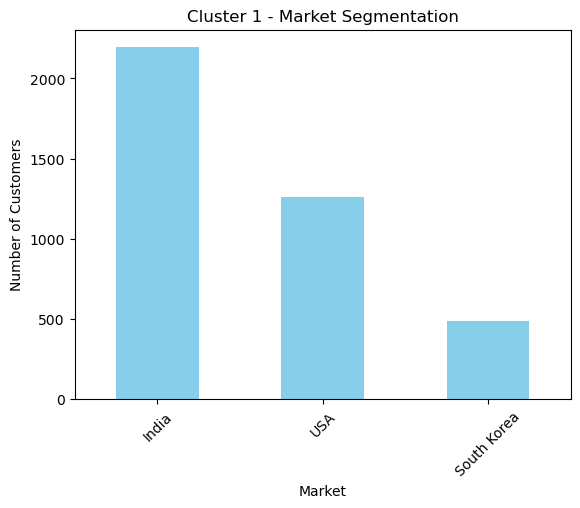

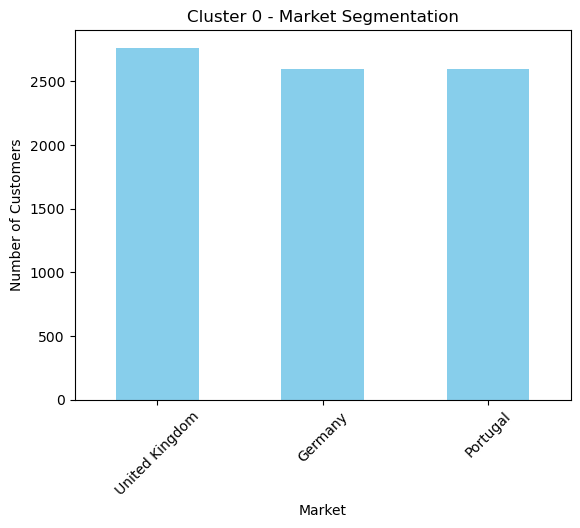

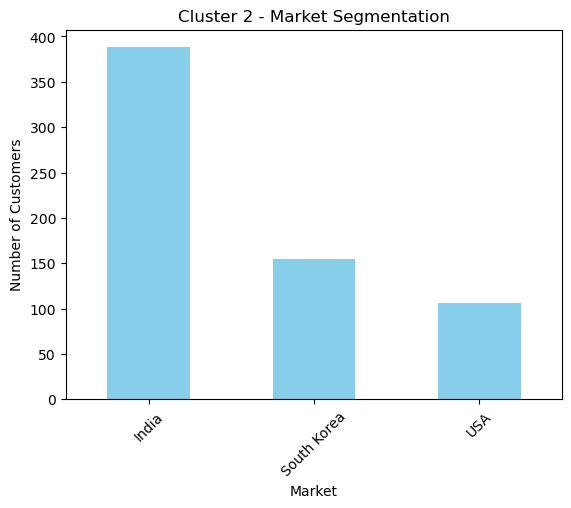

In [120]:
import matplotlib.pyplot as plt

# Market Segmentation within each cluster
for cluster in grouped_df['cluster'].unique():
    cluster_data = grouped_df[grouped_df['cluster'] == cluster]
    market_distribution = cluster_data['market'].value_counts().head(3)  # Top 3 markets
    market_distribution.plot(kind='bar', color='skyblue')
    plt.title(f"Cluster {cluster} - Market Segmentation")
    plt.xlabel("Market")
    plt.ylabel("Number of Customers")
    plt.xticks(rotation=45)
    plt.show()


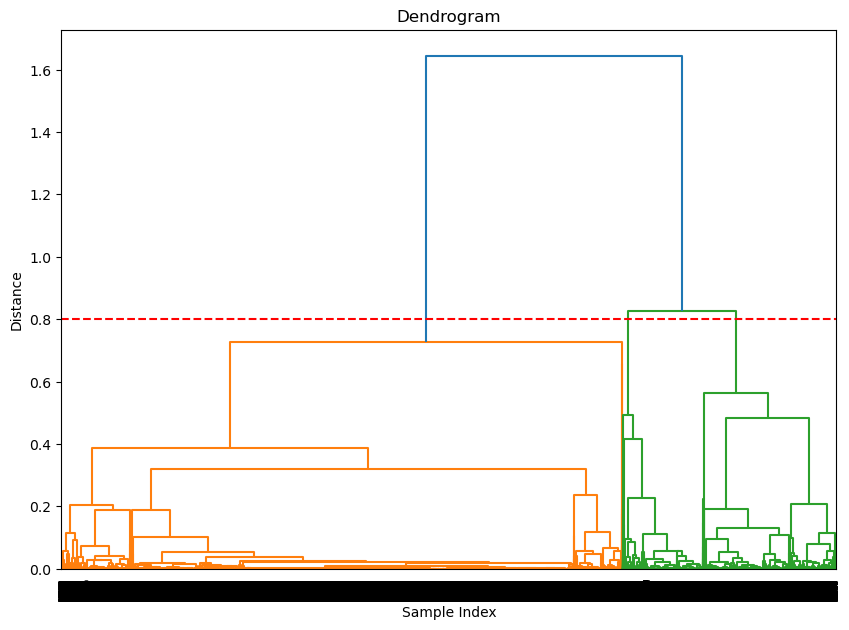

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Perform hierarchical clustering
Z = linkage(scaled_df, method='average', metric='cosine')  # Using cosine similarity as distance measure

# Plot the dendrogram
plt.figure(figsize=(10, 7))
plt.title('Dendrogram')
dendrogram(Z)
plt.axhline(y=0.8, color='r', linestyle='--')  # Add a horizontal line at distance 80
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

